In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report
from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder, StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
dataset = pd.read_csv('car performance-dataset.csv')

In [8]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [10]:
dataset.shape

(398, 9)

In [11]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.298676,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

<Axes: >

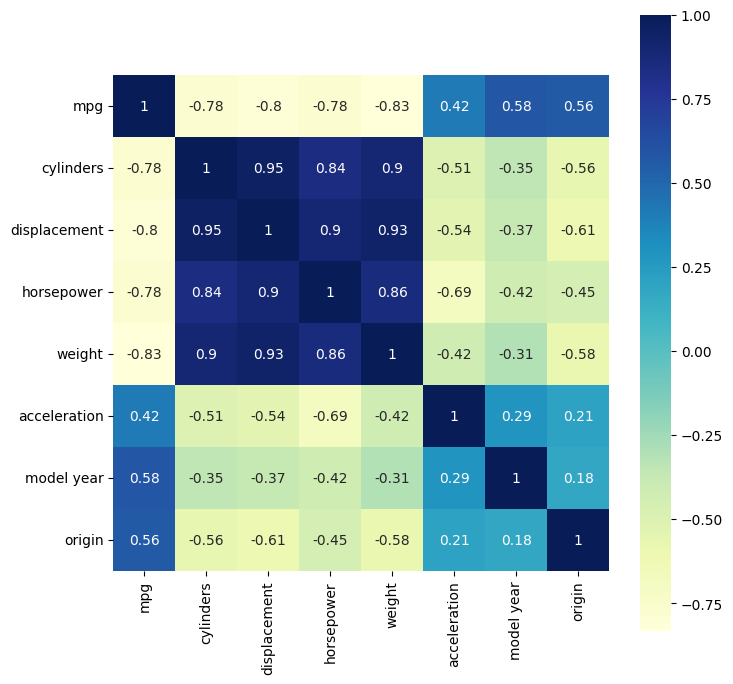

In [13]:
f, ax = plt.subplots(figsize=(8, 8))
corr = dataset.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='YlGnBu', square=True, ax=ax, annot=True)

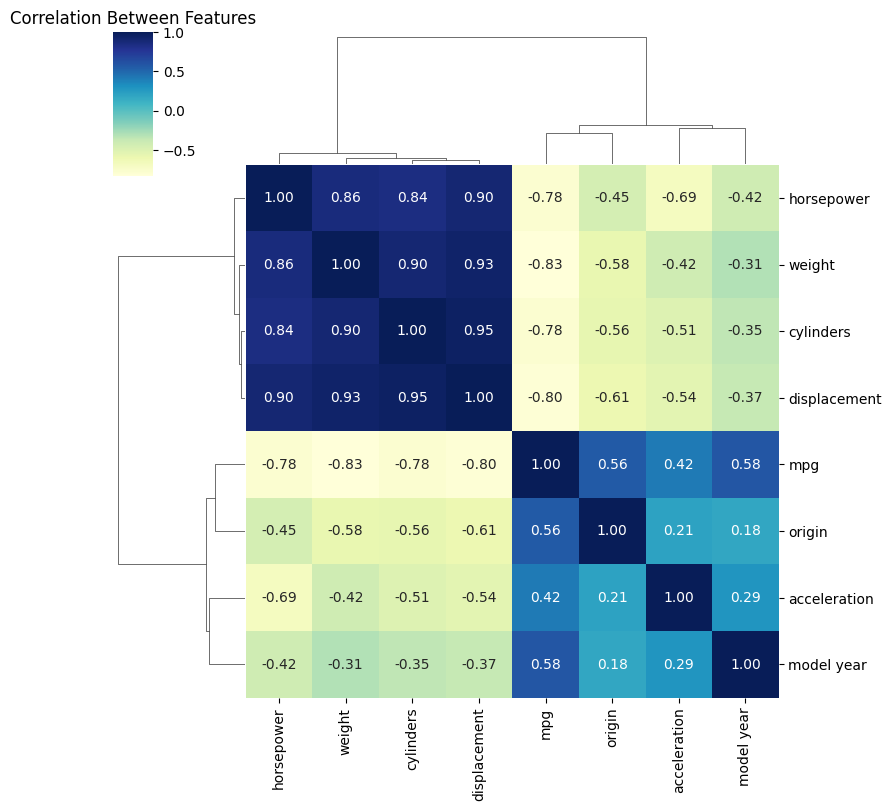

In [14]:
sns.clustermap(dataset.corr(), figsize = (8,8), annot = True, fmt = ".2f", cmap='YlGnBu')
plt.title("Correlation Between Features")
plt.show()

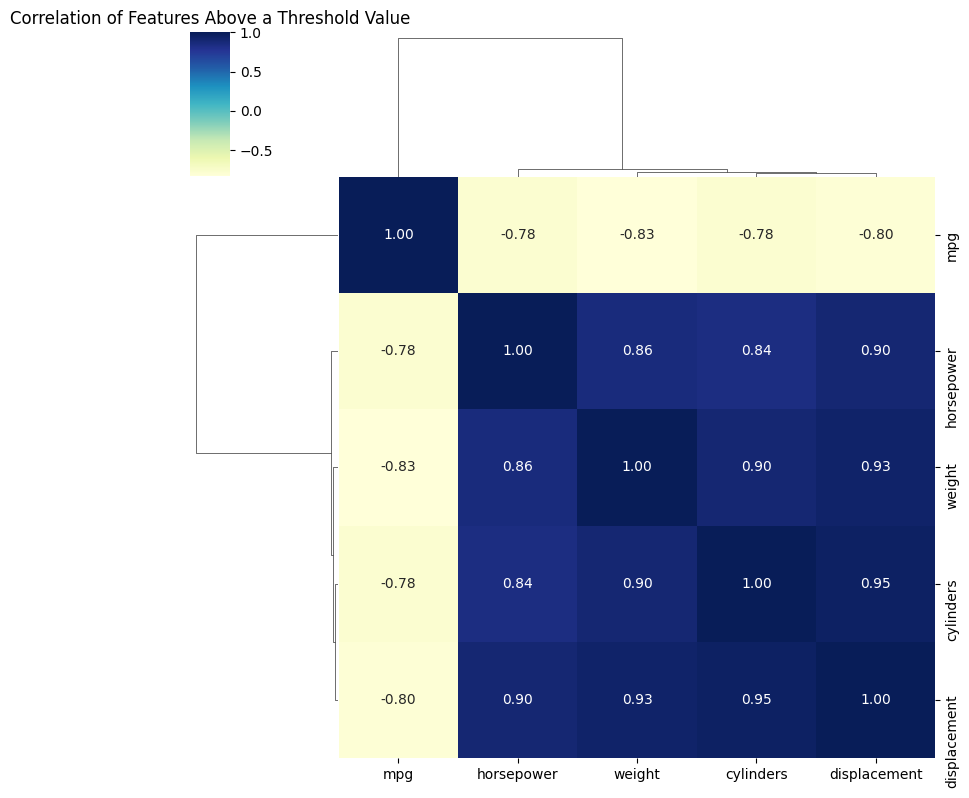

In [15]:
threshold = 0.75
filtre = np.abs(dataset.corr()["mpg"]) > threshold
corr_features = dataset.corr().columns[filtre].tolist()
sns.clustermap(dataset[corr_features].corr(), figsize = (8,8), annot = True, fmt = ".2f", cmap='YlGnBu')
plt.title("Correlation of Features Above a Threshold Value")
plt.show()

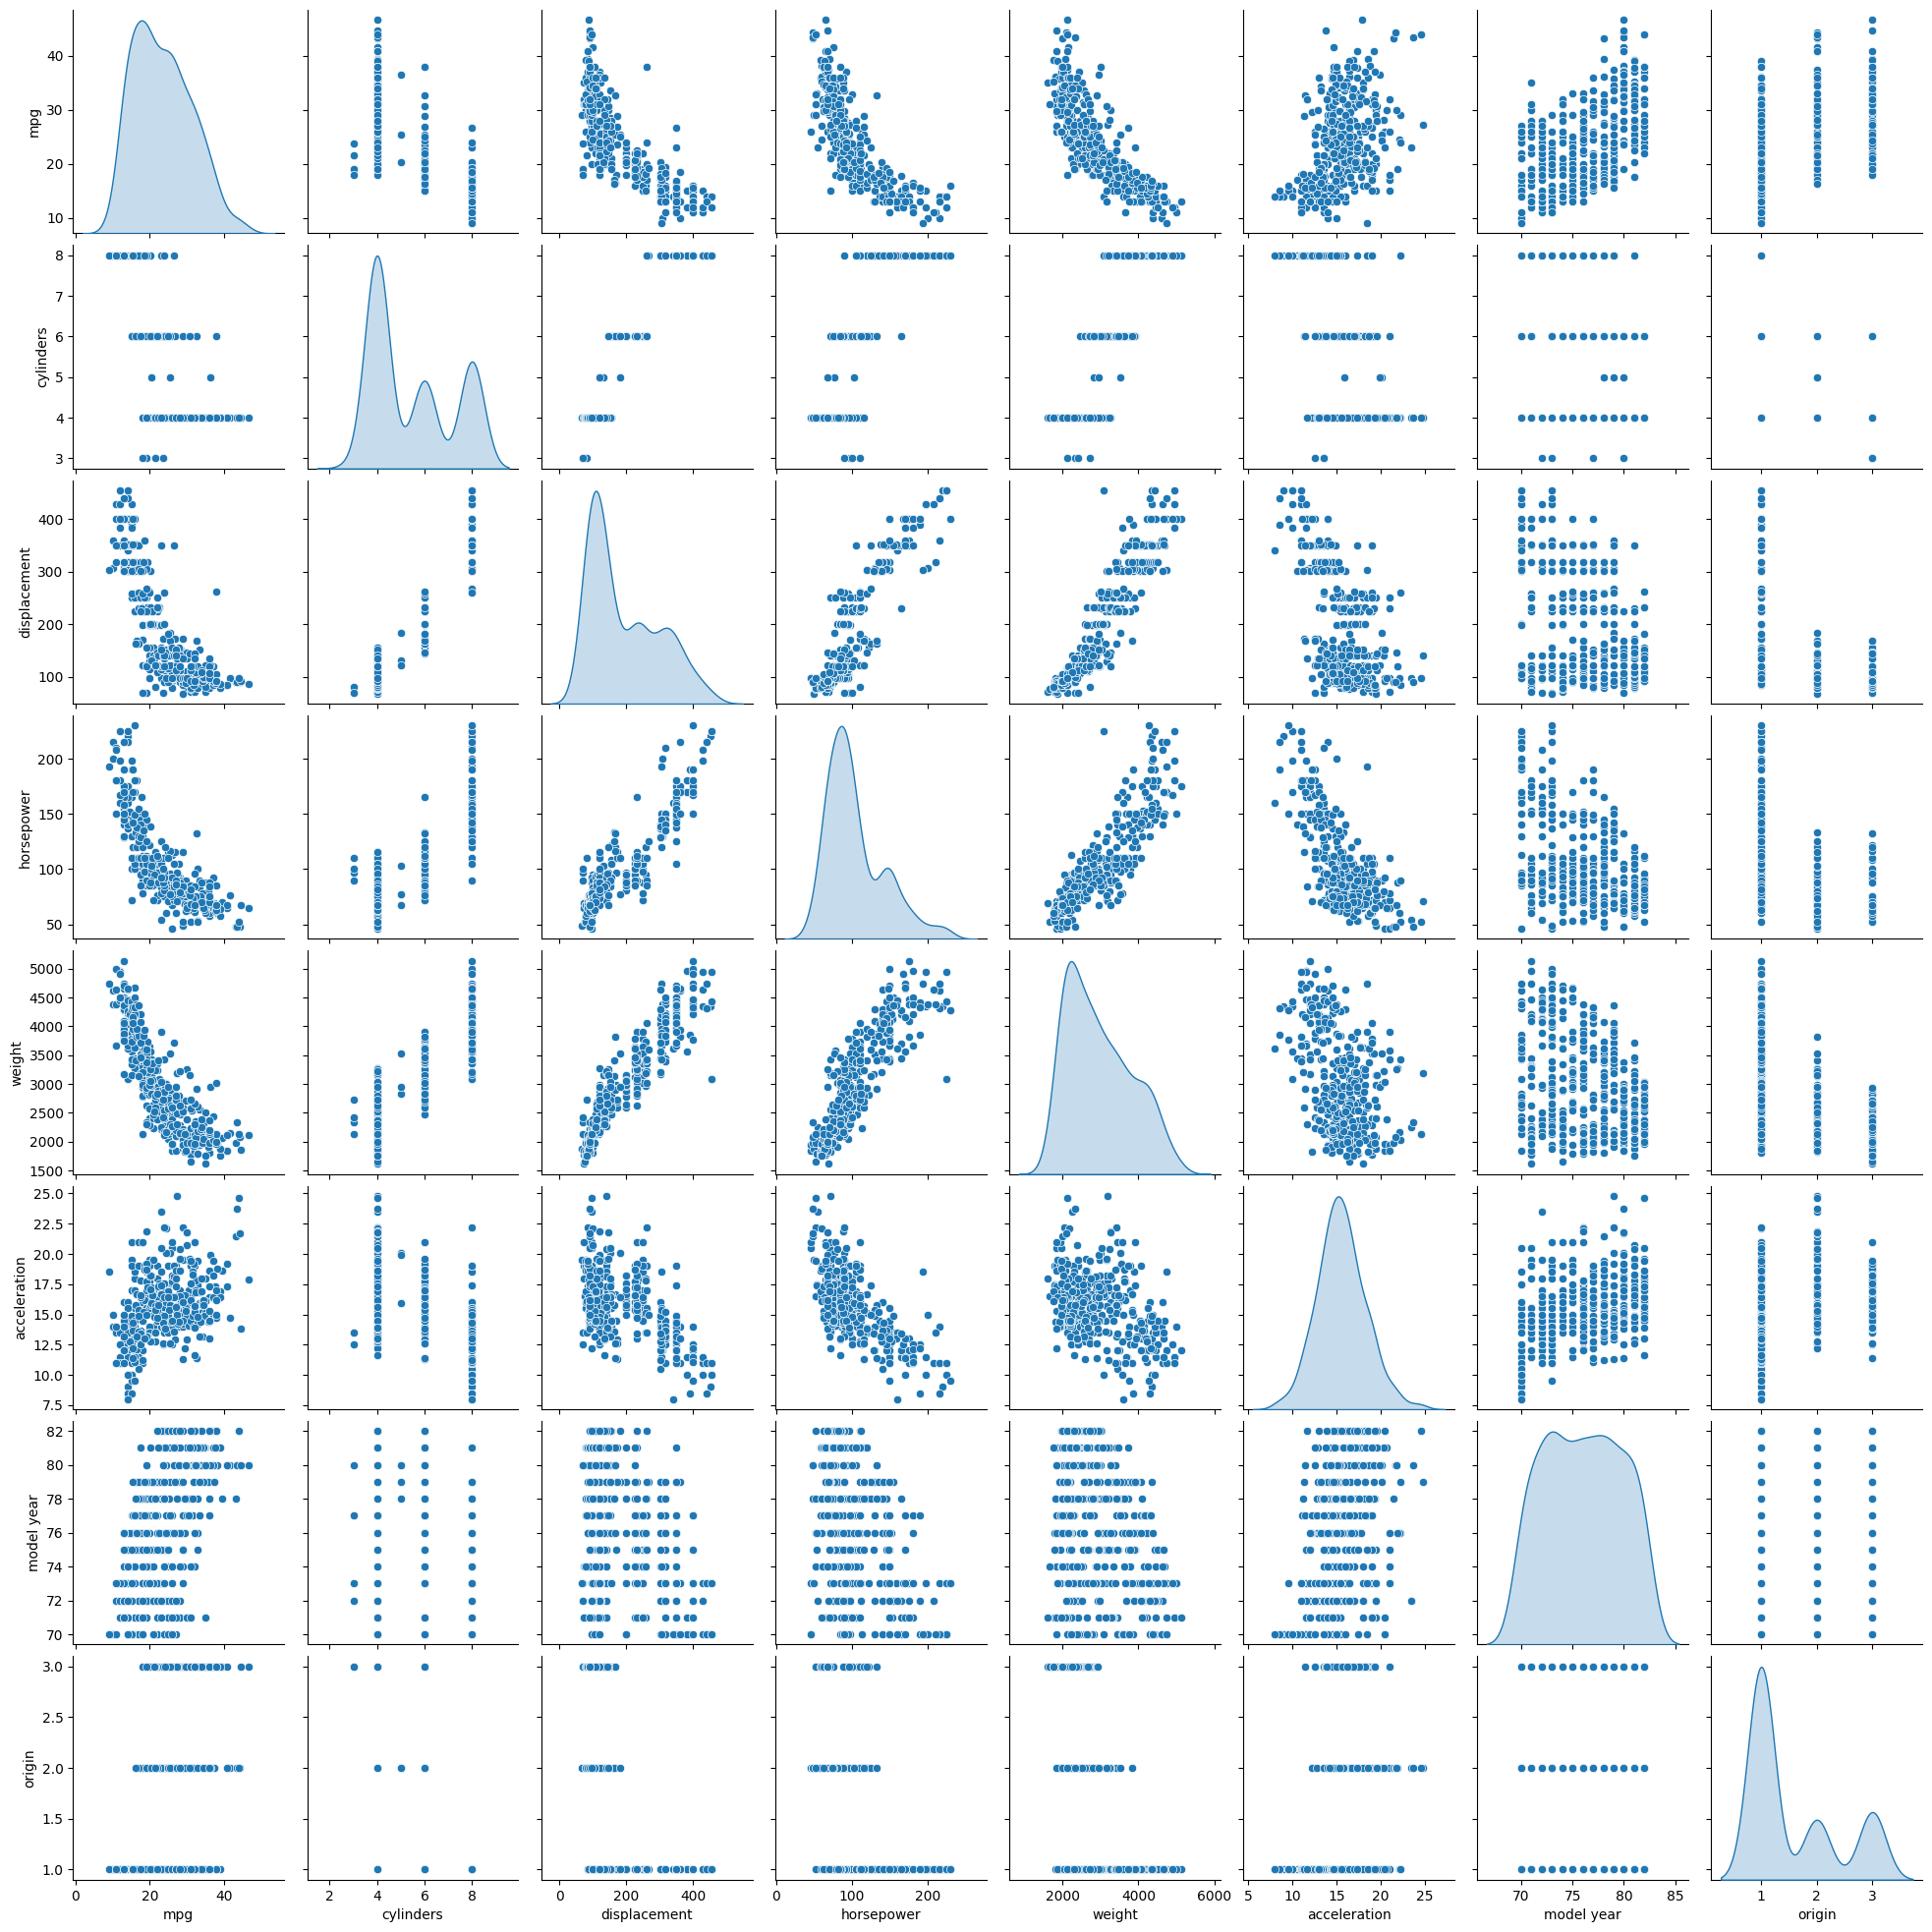

In [16]:
sns.pairplot(dataset,diag_kind= "kde");

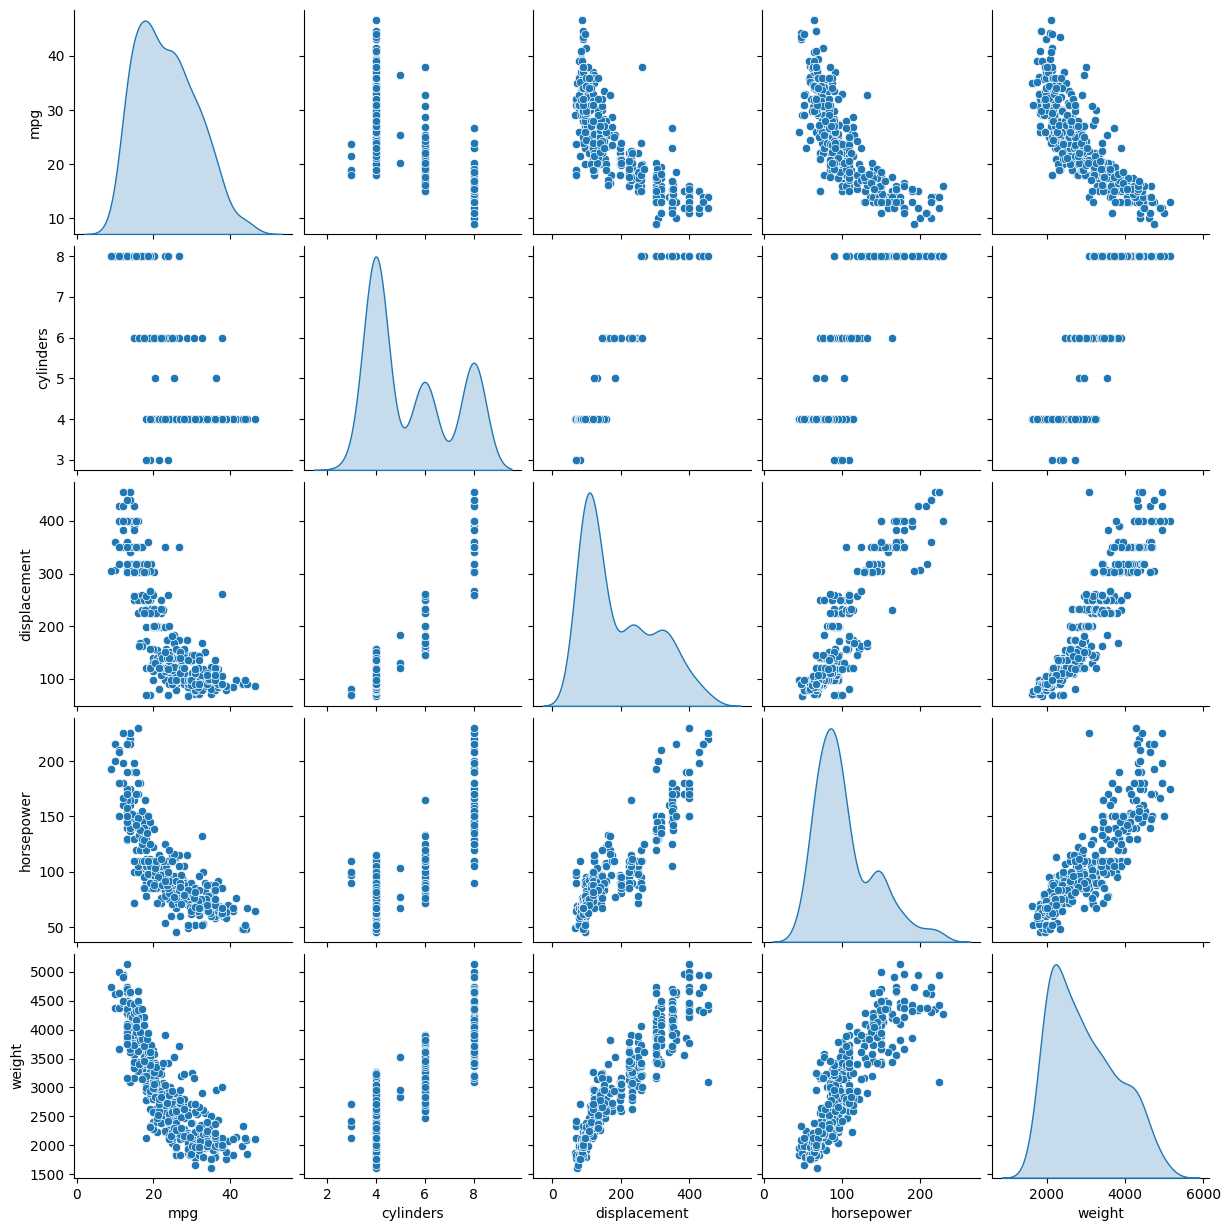

In [17]:
sns.pairplot(dataset[corr_features],diag_kind= "kde");

Text(0.5, 1.0, 'No. of Cylinders')

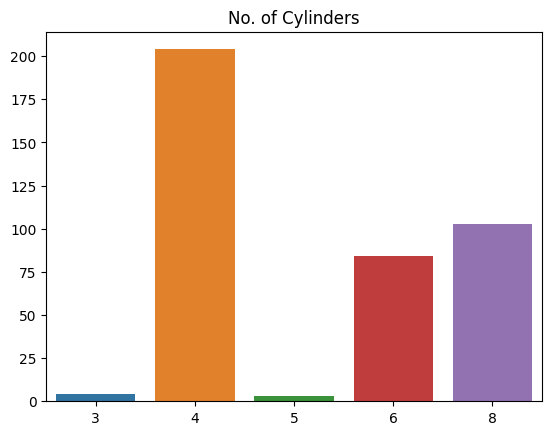

In [18]:
sns.barplot(x = dataset["cylinders"].value_counts().index, y = dataset["cylinders"].value_counts().values)
plt.title("No. of Cylinders")

Text(0.5, 1.0, 'Origin')

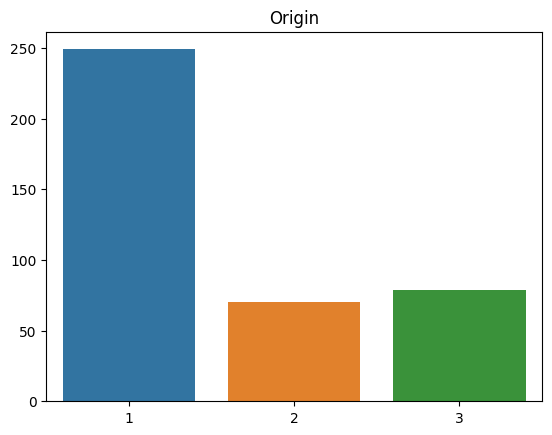

In [19]:
sns.barplot(x = dataset["origin"].value_counts().index, y = dataset["origin"].value_counts().values)
plt.title("Origin")

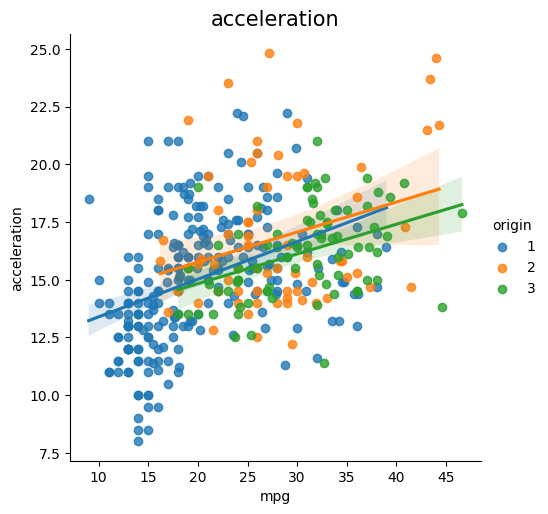

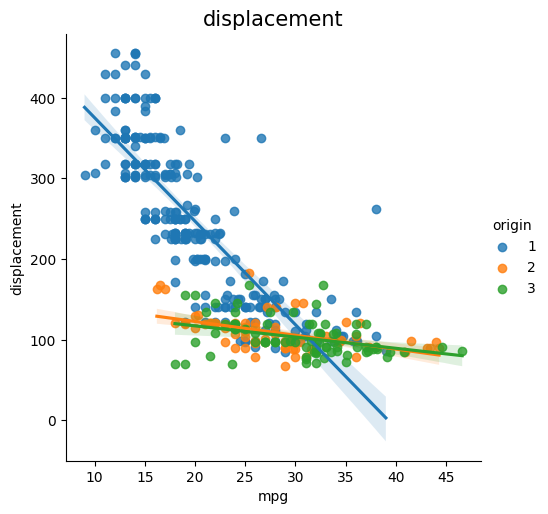

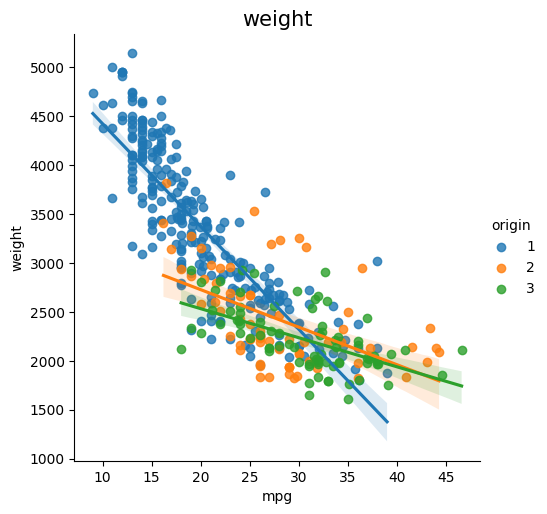

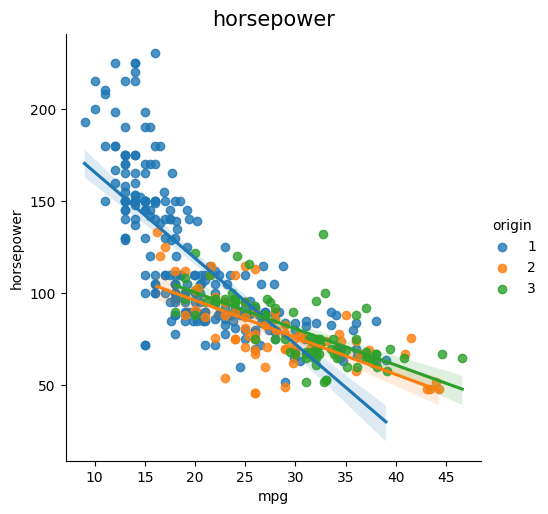

In [20]:
for i in ["acceleration","displacement","weight","horsepower"]:
    plot = sns.lmplot(x = "mpg", y = i, data = dataset, hue = 'origin')
    plt.title(i, fontsize = 15)
    plt.show()

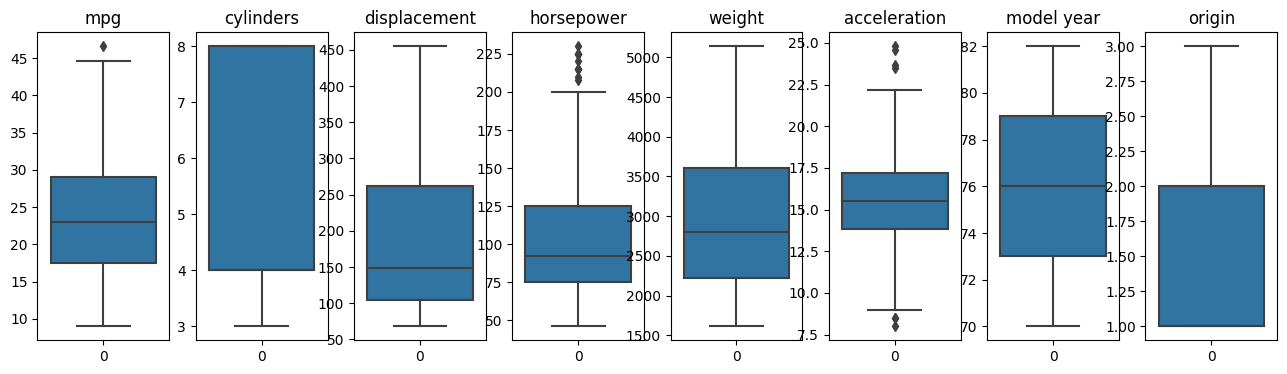

In [21]:
x = 0
plt.figure(figsize=(16, 4))
for i in dataset.select_dtypes("number"):
    x = x + 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=dataset[i])
    plt.title(i)

plt.show()

In [22]:
for i in dataset.select_dtypes("number"):
  Q1 = dataset[i].quantile(0.25)
  Q3 = dataset[i].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 - (whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  dataset[i]=np.where(dataset[i]>upper_whisker,upper_whisker,np.where(dataset[i]<lower_whisker,lower_whisker,dataset[i]))

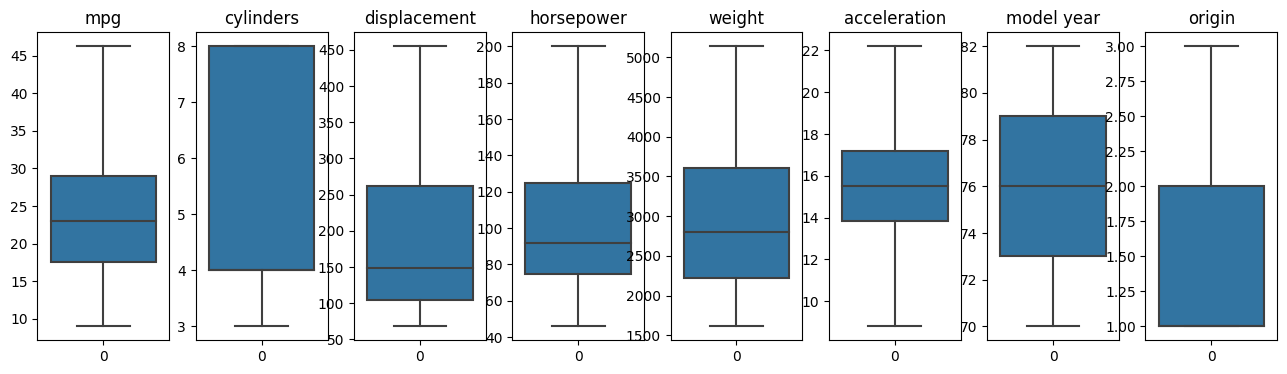

In [23]:
x = 0
plt.figure(figsize=(16, 4))
for i in dataset.select_dtypes("number"):
    x = x + 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=dataset[i])
    plt.title(i)

plt.show()

In [24]:
dataset.shape

(398, 9)

<Axes: ylabel='origin'>

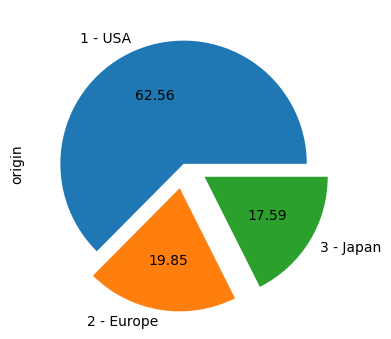

In [25]:
plt.figure(figsize = (4,4))
a= dataset['origin']
a.value_counts().plot(kind = 'pie',autopct = '%.2f',explode = [0,0.2, 0.2],labels = ['1 - USA','2 - Europe','3 - Japan'])

In [26]:
x = dataset.iloc[:,1:8].values
y = dataset.iloc[:,0].values

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [28]:
sd = StandardScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)

In [29]:
x_train

array([[ 0.31188164,  0.07178791, -0.51983743, ...,  0.08277806,
         0.51815083, -0.72739454],
       [-0.85718413, -1.12295743, -1.45150889, ...,  1.47469499,
         0.51815083,  1.74990343],
       [-0.85718413, -0.51579176, -0.43514002, ...,  0.66274345,
         0.79388109, -0.72739454],
       ...,
       [-0.85718413, -1.22088737, -1.53620629, ...,  1.51335935,
        -0.86050048,  0.51125445],
       [ 0.31188164,  0.56143764, -0.0963504 , ..., -0.22653682,
        -1.411961  , -0.72739454],
       [-0.85718413, -1.00544149, -0.91509199, ...,  0.35342857,
        -0.30903996,  0.51125445]])

In [30]:
x_test

array([[ 1.55196568,  1.41301063,  1.18178424,  1.36263296, -0.82409491,
        -0.95215446, -0.67909662],
       [-0.85418266, -0.50654411, -0.71999358, -0.49599798,  0.52081722,
        -0.43467921, -0.67909662],
       [ 1.55196568,  0.96723725,  0.86482127,  1.55587436,  0.18458919,
        -0.95215446, -0.67909662],
       [-0.85418266, -0.68849243, -0.42741237,  0.01579895,  1.36138731,
        -0.95215446,  0.60221776],
       [ 0.34889151,  0.33041814, -0.1104494 ,  0.37768739,  0.01647517,
        -1.21089208, -0.67909662],
       [-0.85418266, -1.12516839, -0.86628418, -1.58400563,  0.85704526,
        -1.21089208,  1.88353214],
       [-0.85418266, -0.99780457, -0.96381124, -1.1600457 , -0.08439324,
         0.85900891,  1.88353214],
       [-0.85418266, -0.50654411, -0.35426707, -0.65293342,  1.36138731,
        -0.95215446, -0.67909662],
       [ 1.55196568,  1.85878401,  1.10863894,  0.93164608, -2.00089303,
        -1.46962971, -0.67909662],
       [ 0.34889151, -0.2063

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=200, max_depth = 10, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, random_state= 0)
rfreg.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=200,
                      random_state=0)

In [32]:
y_pred = rfreg.predict(x_test)
y_pred

array([14.00108984, 24.71331372, 14.48548743, 21.67562118, 18.3352788 ,
       29.20794195, 33.95178681, 22.41410835, 14.75090206, 25.29015774,
       33.34375073, 35.31185893, 20.21109465, 29.20308333, 16.55699601,
       31.84549826, 27.35809252, 26.09358456, 17.96753934, 31.76368633,
       15.50124946, 23.95043219, 23.62006174, 21.0423337 , 31.82010877,
       25.68672222, 32.54162131, 28.69646011, 29.55204389, 16.86514982,
       19.11849925, 31.06881331, 18.28667143, 31.13672298, 20.78507386,
       23.89842847, 19.433357  , 16.62688095, 32.23169679, 12.79516873,
       13.59792361, 14.55532025, 27.72465326, 28.48079167, 28.33252121,
       23.39112305, 19.84555848, 14.19947671, 22.53566386, 29.29839577,
       32.09949518, 25.69399165, 16.61112153, 27.73875304, 15.04294193,
       12.82604612, 19.89596906, 23.23202279, 29.88754389, 16.6157381 ,
       19.45065893, 25.7011019 , 19.79140484, 20.28586848, 13.42821714,
       14.927338  , 13.67093857, 17.64390187, 24.20373627, 14.05

MSE: 7.686572966515087
RMSE: 2.772466945973403
MAE: 1.9604974096014849
R-squared: 0.8769543432909204


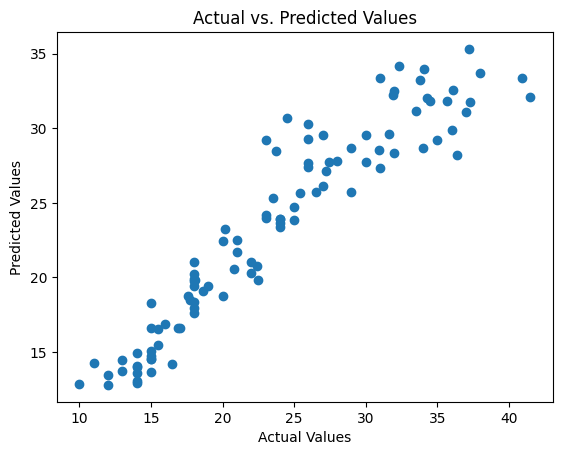

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


In [34]:
data = {'Sample': range(1, len(y_test) + 1),
        'Actual Value': y_test,
        'Predicted Value': y_pred}

df = pd.DataFrame(data)

df_styled = df.style.set_caption('Comparison of Actual MPG and Predicted MPG')

display(df_styled)


,Sample,Actual Value,Predicted Value
0,1,14.000000,14.001090
1,2,25.000000,24.713314
2,3,13.000000,14.485487
3,4,21.000000,21.675621
4,5,18.000000,18.335279
5,6,35.000000,29.207942
6,7,34.100000,33.951787
7,8,20.000000,22.414108
8,9,15.000000,14.750902
9,10,23.500000,25.290158


In [35]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
parametersGrid = {'nthread':[4],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000]}

model_xgb = xgb.XGBRegressor()

clf = GridSearchCV(model_xgb, parametersGrid, cv = 10, scoring='neg_mean_squared_error', refit=True, n_jobs = 5, verbose=True)

clf.fit(x_train, y_train)
model_xgb = clf.best_estimator_

y_pred = clf.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("XGBRegressor MSE: ",mse)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
XGBRegressor MSE:  7.472995228159615


MSE: 7.472995228159615
RMSE: 2.7336779671643137
MAE: 1.9449708347320558
R-squared: 0.8803732678479201


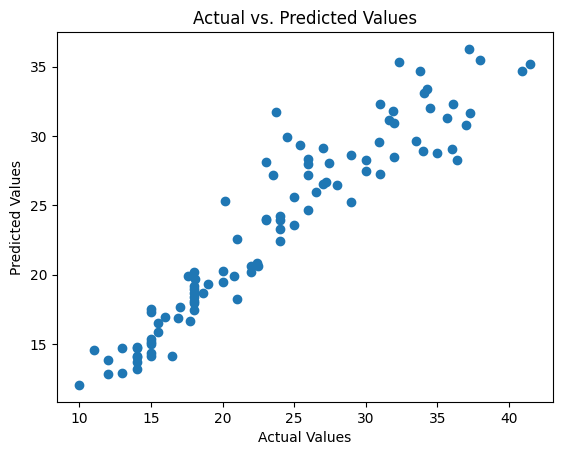

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred, )
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [37]:
data = {'Sample': range(1, len(y_test) + 1),
        'Actual Value': y_test,
        'Predicted Value': y_pred}

df = pd.DataFrame(data)

df_styled = df.style.set_caption('Comparison of Actual MPG and Predicted MPG')

display(df_styled)

,Sample,Actual Value,Predicted Value
0,1,14.000000,14.062531
1,2,25.000000,25.586550
2,3,13.000000,14.722574
3,4,21.000000,18.270033
4,5,18.000000,17.935825
5,6,35.000000,28.784954
6,7,34.100000,33.081348
7,8,20.000000,20.265865
8,9,15.000000,15.108772
9,10,23.500000,27.204460


In [38]:
values=[[8, 367, 189, 3562, 17, 70, 1]]
new_mileage = rfreg.predict(values)
print('The Predicted new mileage for the above values is %1.3f as per Random Forest Regressor'%new_mileage)

The Predicted new mileage for the above values is 18.150 as per Random Forest Regressor


In [41]:
values=[[8, 367, 189, 3562, 17, 70, 1]]
new_mileage=clf.predict(values)
print('The Predicted new mileage for the above values is %1.3f as per XGBoost'%new_mileage)

The Predicted new mileage for the above values is 21.466 as per XGBoost


In [40]:
import pickle
pickle.dump(rfreg,open('Car Performance.pkl','wb'))